In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('C:/Users/jghhd/Pyback_exercise/customerGroups.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6620 entries, 0 to 6619
Data columns (total 71 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   g1_1    6620 non-null   float64
 1   g1_2    6620 non-null   int64  
 2   g1_3    6620 non-null   int64  
 3   g1_4    6620 non-null   int64  
 4   g1_5    6620 non-null   int64  
 5   g1_6    6620 non-null   int64  
 6   g1_7    6620 non-null   int64  
 7   g1_8    6620 non-null   int64  
 8   g1_9    6620 non-null   int64  
 9   g1_10   6620 non-null   int64  
 10  g1_11   6620 non-null   int64  
 11  g1_12   6620 non-null   int64  
 12  g1_13   6620 non-null   float64
 13  g1_14   6620 non-null   float64
 14  g1_15   6620 non-null   float64
 15  g1_16   6620 non-null   float64
 16  g1_17   6620 non-null   float64
 17  g1_18   6620 non-null   float64
 18  g1_19   6620 non-null   float64
 19  g1_20   6620 non-null   float64
 20  g1_21   6620 non-null   float64
 21  g2_1    6620 non-null   float64
 22  

In [5]:
data.head()

,g1_1,g1_2,g1_3,g1_4,g1_5,g1_6,g1_7,g1_8,g1_9,g1_10,...,c_20,c_21,c_22,c_23,c_24,c_25,c_26,c_27,c_28,target
0,4.50,1,3,4,5,1,1,4,6,0,...,-0.383704,-0.065449,0.584000,0.488000,0,-3.232000,-1.944000,-0.007944,1.76,2
1,2.20,24,22,46,10,24,28,18,22,-4,...,-0.346839,-0.159744,-0.947614,0.463540,0,-5.342174,-1.321355,0.181064,1.85,1
2,12.00,7,4,11,18,8,11,2,10,-3,...,-2.673934,-1.592303,0.525305,-0.467169,0,-6.566521,-4.176403,-0.040277,2.05,2
3,1.91,8,5,13,14,6,7,6,9,-1,...,0.616027,0.404945,-1.506923,0.741964,0,-2.438120,-0.787132,-0.012101,1.82,0
4,2.50,23,16,39,14,33,25,18,27,8,...,-1.057214,-1.159294,0.751012,-0.182052,0,-1.259728,0.059574,0.042613,1.99,2


In [6]:
data.isnull().sum()

g1_1      0
g1_2      0
g1_3      0
g1_4      0
g1_5      0
         ..
c_25      0
c_26      0
c_27      0
c_28      0
target    0
Length: 71, dtype: int64

In [7]:
data.shape

(6620, 71)

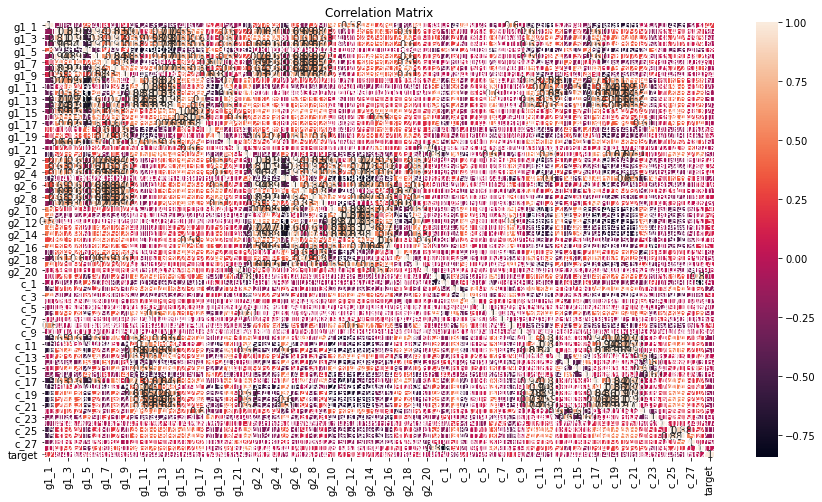

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True,linewidths=0.2)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# group the data by profitable group
grouped = data.groupby('target')

# count the number of rows in each group
group_counts = grouped.size()

# calculate the percentage of campaigns in each group
total_campaigns = data.shape[0]
group1_percent = (group_counts[1]/total_campaigns) * 100
group2_percent = (group_counts[2]/total_campaigns) * 100
neither_percent = (group_counts[0]/total_campaigns) * 100

print("Group 1: {:.2f}%".format(group1_percent))
print("Group 2: {:.2f}%".format(group2_percent))
print("Neither group: {:.2f}%".format(neither_percent))

Group 1: 46.47%
Group 2: 28.35%
Neither group: 25.18%


# 2


In [40]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# load the data
data = pd.read_csv('C:/Users/jghhd/Pyback_exercise/customerGroups.csv')

# split the data into features and target
X = data[['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26']]
y = data['target']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build the model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# evaluate the model on the test data
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(acc * 100))


Accuracy: 58.46%


C:\Users\jghhd\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [27]:
data.columns

Index(['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g1_21', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'g2_21', 'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26', 'c_27',
       'c_28', 'target'],
      dtype='object')

In [75]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

# load data
data
# split data into X and y
X = data[['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26']]
y = data['target']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# save the model to disk
filename = 'my_model.sav'
pickle.dump(filename, 'wb') 
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# save the model to a file
joblib.dump(clf, 'trained_model.pkl')

TypeError: file must have a 'write' attribute

# 3

The model could be a small campaigning aid so that someone could know which group to target with their campaign, to test the model I would use data that was known after the camania

# 4

In [68]:
pip install Flask

Note: you may need to restart the kernel to use updated packages.


easy way to build API

In [1]:
from flask import Flask, request, jsonify
from sklearn.externals import joblib

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    # load the model
    model = joblib.load("my_model.pkl")

    # get the data from the request
    data = request.get_json()

    # make predictions with the model
    predictions = model.predict(data)

    # return the predictions as a JSON object
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True)


ImportError: cannot import name 'joblib' from 'sklearn.externals' (C:\Users\jghhd\anaconda3\lib\site-packages\sklearn\externals\__init__.py)

in this task I remembered the lazy predict but unfortunately it doesn't work :/.

In [48]:
from lazypredict.Supervised import LazyRegressor
X, y = shuffle(data, data.target, random_state=13)
X = X.astype(np.float32)
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

ModuleNotFoundError: No module named 'sklearn.utils.testing'

In [ ]:
pip install sklearn-utils

In [52]:
from lazypredict.Supervised import LazyClassifier
data
X = data[['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


ModuleNotFoundError: No module named 'sklearn.utils.testing'

In [51]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
data
# split data into X and y
X = data[['g1_1', 'g1_2', 'g1_3', 'g1_4', 'g1_5', 'g1_6', 'g1_7', 'g1_8', 'g1_9',
       'g1_10', 'g1_11', 'g1_12', 'g1_13', 'g1_14', 'g1_15', 'g1_16', 'g1_17',
       'g1_18', 'g1_19', 'g1_20', 'g2_1', 'g2_2', 'g2_3', 'g2_4',
       'g2_5', 'g2_6', 'g2_7', 'g2_8', 'g2_9', 'g2_10', 'g2_11', 'g2_12',
       'g2_13', 'g2_14', 'g2_15', 'g2_16', 'g2_17', 'g2_18', 'g2_19', 'g2_20',
       'c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9',
       'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16', 'c_17', 'c_18',
       'c_19', 'c_20', 'c_21', 'c_22', 'c_23', 'c_24', 'c_25', 'c_26']]
y = data['target']
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 54.74%


# 3

In [62]:
!pip show scikit-learn

Name: scikit-learn
Version: 1.2.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\jghhd\anaconda3\lib\site-packages
Requires: numpy, joblib, scipy, threadpoolctl
Required-by: qiskit-ignis, qiskit-aqua, sklearn, sklearn-utils, lightgbm, lazypredict, imbalanced-learn


In [61]:
!pip uninstall scikit-learn
!pip install scikit-learn

^C
^C


In [65]:
from lazypredict.Supervised import LazyClassifier

# load the model
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)

# load the data
X_test = pd.read_csv("test_data.csv")

ModuleNotFoundError: No module named 'sklearn.utils.testing'